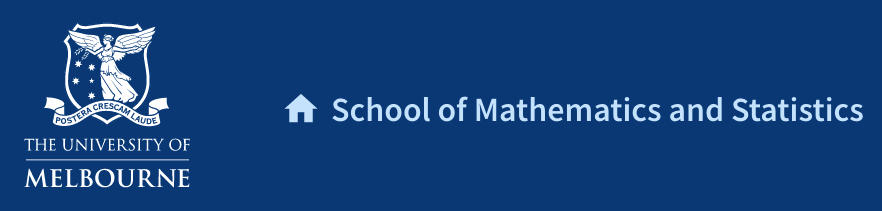

# MAST 90014 - Tutorial 1 SOL 
# Modelling examples

In this tutorial, we will model and implement some simple problems.

(Winston, Wayne L., and Jeffrey B. Goldberg. Operations research: applications and algorithms. Vol. 3. Belmont: Thomson Brooks/Cole, 2004.)

## Farmer Jones

Farmer Jones must determine how many acres of corn and wheat to plant this year. An acre of wheat yields 25 bushels of wheat and requires 10 hours of labor per week. An acre of corn yields 10 bushels of corn and requires 4 hours of labor per week. All wheat can be sold at AUD 4 a bushel, and all corn can be sold at AUD 3 a bushel. Seven acres of land and 40 hours per week of labor are available. Government regulations require that at least 30 bushels of corn be produced per week during the current year. Formulate an LP whose solution will tell Farmer Jones how to maximize the total revenue from wheat and corn.

Model:


$x_{1} \geq 0$ : number of acres of wheat planted, 

$x_{2} \geq 0$ : number of acres of corn planted.

$\begin{array}{ll}
\operatorname{Max} & z=100 x_{1}+30 x_{2} \\
\text { subject to } & 10 x_{1}+4 x_{2} \leq 40 \\
& x_{1}+x_{2} \leq 7 \\
& 10 x_{2} \geq 30 \\
& x_{1}, x_{2} \geq 0
\end{array}$

In [1]:
# Farmer Jones model

#!pip install gurobipy #uncomment if not installed
import gurobipy as gp
from gurobipy import GRB


m = gp.Model('farmerJones')

wheat_acres = m.addVar(name="wheat")
corn_acres = m.addVar(name="corn")

m.addConstr(wheat_acres + corn_acres <= 7, name='c1')
m.addConstr(10 * wheat_acres + 4 * corn_acres <= 40, name='c2')
m.addConstr(10 * corn_acres >= 30, name='c3')
m.setObjective(25 * 4 * wheat_acres + 10 * 3 * corn_acres, GRB.MAXIMIZE)
m.optimize()

# Display optimal values of decision variables
for v in m.getVars():
    if v.x > 1e-6:
        print(v.varName, v.x)

# Display optimal solution value
print('Total profit: ', m.objVal)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-04
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 2 columns and 5 nonzeros
Model fingerprint: 0xdce107a4
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+00, 4e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.9000000e+02   1.946200e+00   0.000000e+00      0s
       3    3.7000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.700000000e+02
wheat 2.8
corn 3.0
Total profit:  370.0


## Furnco

Furnco manufactures desks and chairs. Each desk uses 4 units of wood, and each chair uses 3. A desk contributes AUD 40 to profit, and a chair contributes AUD 25. Marketing restrictions require that the number of chairs produced be at least twice the number of desks produced. If 20 units off wood are available, formulate an LP to maximise Furnco’s profit. 

Model:

$x_{1} \geq 0$ : number of desks to be produced, 

$x_{2} \geq 0$ : number of chairs to be produced.

$
\begin{array}{ll}
\text { Max } & z=40 x_{1}+25 x_{2} \\
\text { subject to } & -2 x_{1}+x_{2} \geq 0 \\
& 4 x_{1}+3 x_{2} \leq 20 \\
& x_{1}, x_{2} \geq 0
\end{array}
$

In [ ]:
#Furnco manufacturing model.

# Farmer Jones model

#!pip install gurobipy #uncomment if not installed
import gurobipy as gp
from gurobipy import GRB


print("=== Furnco manufacturing model ===")

m = gp.Model('Furnco')
desks = m.addVar(name="desks")
chairs = m.addVar(name="chairs")

m.addConstr(4*desks + 3*chairs <= 20, name='c1')
m.addConstr(chairs >= 2*desks, name='c2')
m.setObjective(40*desks + 25*chairs, GRB.MAXIMIZE)
m.optimize()

# Display optimal values of decision variables
for v in m.getVars():
    if v.x > 1e-6:
        print(v.varName, v.x)

# Display optimal total matching score
print('Total profit: ', m.objVal)

## Postal workers (Full time)

A post office requires different numbers of full-time employees on different days of the week. The number of full-time employees required on each day is given in the list below. Union rules state that each full-time employee must work five consecutive days and then receive two days off. For example, an employee who works Monday to Friday must be off on Saturday and Sunday. The post office wants to meet its daily requirements while minimising the number of full-time employees it needs to hire.

* Day 0 = Monday: 17 employees 
* Day 1 = Tuesday: 13 employees 
* Day 2 = Wednesday: 15 employees 
* Day 3 = Thursday: 19 employees 
* Day 4 = Friday: 14 employees
* Day 5 = Saturday: 16 employees 
* Day 6 = Sunday: 11 employees
      
      
Check your difference in your answers when you define the variables as continuous (default) or as integers.      

$I$:  set of days of the week,

$d_{i}$: number of employees required on day $i \in I$.

Define variables:
$s_{i} \geq 0:$ number of employees starting on day $i \in I$

$
\begin{array}{ll}
\operatorname{Min} & z=\sum_{i \in I} s_{i} \\
\text { subject to } & \sum_{j=i+3}^{i+7} s_{(j \bmod 7)} \geq d_{i}, i \in I \\
& s_{i} \geq 0, \quad i \in I .
\end{array}
$

In [ ]:
#Full time postal workers model.

print("=== Full time postal workers model ===")

day, working, dem = gp.multidict({
    'mon': [{'thu','fri','sat','sun','mon'}, 17],
    'tue': [{'fri','sat','sun','mon','tue'}, 13],
    'wed': [{'sat','sun','mon','tue','wed'}, 15],
    'thu': [{'sun','mon','tue','wed','thu'}, 19],
    'fri': [{'mon','tue','wed','thu', 'fri'}, 14],
    'sat': [{'tue','wed','thu', 'fri','sat'}, 16],
    'sun': [{'wed','thu', 'fri','sat','sun'}, 11]
})

import gurobipy as gp
from gurobipy import GRB

m = gp.Model()
w = m.addVars(day, vtype=GRB.INTEGER, name="w")
demand =  m.addConstrs( gp.quicksum(w[i] for i in working[d]) >= dem[d] for d in day)
m.setObjective(gp.quicksum(w[d] for d in day) , GRB.MINIMIZE)
m.optimize()
m.write("model.lp")

# Display optimal values of decision variables
for v in m.getVars():
    if v.x > 1e-6:
        print(v.varName, v.x)

# Optimal solution value
print('Number of workers: ', m.objVal)


## Postal workers (Full and part time)

In the post office example above, suppose that each full-time employee works 8 hours per day. Thus. Mondays requirement of 17 workers may he viewed as a requirement of 8(17) = 136 hours. The post office may meet its daily labor requirements by using both full-time and part-time employees. During each week, a full-time employee works 8 hours a day for five consecutive days, and a part-time employee works 4 hours a day for five consecutive days. A full-time employee costs the post office  AUD15 per hour, whereas a part-time employee (with reduced fringe benefits) costs the post office only AUD 10 per hour. Union requirements limit part-time labor to 25 % of total labor (in hours per week). Formulate an LP/IP to minimize the post office’s weekly labor costs.

$f_{i} \geq 0$ and integer : number of full time employees starting on day $i \in I$,

$p_{i} \geq 0$ and integer : number of part time employees starting on day $i \in I$,

$\operatorname{Min} z=\sum_{i \in I} 600 f_{i}+200 p_{i}$

subject to

$\begin{array}{ll}\sum_{j=i+3}^{i+7} 8 f_{(j \bmod 7)}+4 p_{(j \bmod 7)} \geq 8 d_{i}, & i \in I \\ \sum_{i \in I} 4 p_{i} \leq .25 \sum_{i \in I}\left(8 f_{i}+4 p_{i}\right) & \\ s_{i}, p_{i} \geq 0, \text { and integer } & i \in I\end{array}$

In [2]:
#Full time and part time postal workers model.
import gurobipy as gp
from gurobipy import GRB

print("=== Full and part time postal workers model ===")

day, working, dem = gp.multidict({
    'mon': [{'thu','fri','sat','sun','mon'}, 8*17],
    'tue': [{'fri','sat','sun','mon','tue'}, 8*13],
    'wed': [{'sat','sun','mon','tue','wed'}, 8*15],
    'thu': [{'sun','mon','tue','wed','thu'}, 8*19],
    'fri': [{'mon','tue','wed','thu', 'fri'}, 8*14],
    'sat': [{'tue','wed','thu', 'fri','sat'}, 8*16],
    'sun': [{'wed','thu', 'fri','sat','sun'}, 8*11]
})

m = gp.Model()

ft = m.addVars(day, vtype=GRB.INTEGER, name="ft")
pt = m.addVars(day, vtype=GRB.INTEGER, name="pt")

demand =  m.addConstrs( gp.quicksum( 8*ft[i] + 4*pt[i] for i in working[d]) >= dem[d] for d in day)
ratio =  m.addConstr( gp.quicksum( 3*pt[d] for d in day)   <= gp.quicksum( 2*ft[d] for d in day)  )

m.setObjective(gp.quicksum(8 * 15 * 5 * ft[d] + 4 * 10 * 5 * pt[d] for d in day) , GRB.MINIMIZE)

m.optimize()
m.write("model.lp")

# Display optimal values of decision variables
for v in m.getVars():
    if v.x > 1e-6:
        print(v.varName, v.x)

# Optimal solution value
print('Cost: ', m.objVal)




=== Full and part time postal workers model ===
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 8 rows, 14 columns and 84 nonzeros
Model fingerprint: 0xb868da8b
Variable types: 0 continuous, 14 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e+00, 8e+00]
  Objective range  [2e+02, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+01, 2e+02]
Found heuristic solution: objective 21000.000000
Presolve time: 0.00s
Presolved: 8 rows, 14 columns, 84 nonzeros
Variable types: 0 continuous, 14 integer (0 binary)
Found heuristic solution: objective 20200.000000

Root relaxation: objective 1.228333e+04, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 12283.3333    0    5 20200.0000 12283.3333  39.2%  